<h2 style="color:purple">Employee Retention</h2>

1. Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv("/content/HR_data.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


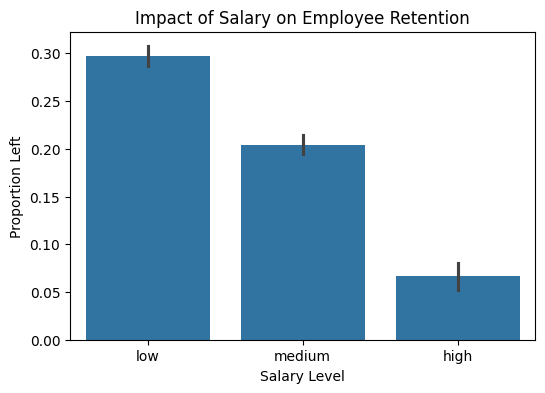

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='salary', y='left', data=df)
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Proportion Left')
plt.show()

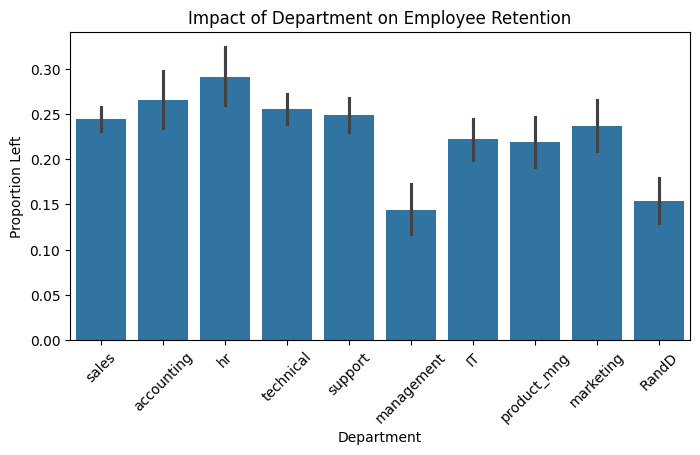

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Department', y='left', data=df)
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Proportion Left')
plt.xticks(rotation=45)
plt.show()

In [ ]:
new_df = df[['satisfaction_level','salary','promotion_last_5years','time_spend_company', 'left']]
new_df.head()

,satisfaction_level,salary,promotion_last_5years,time_spend_company,left
0,0.38,low,0,3,1
1,0.80,medium,0,6,1
2,0.11,medium,0,4,1
3,0.72,low,0,5,1
4,0.37,low,0,3,1


In [ ]:
new_df = pd.get_dummies(new_df, columns=['salary'])
new_df.salary_high.astype(int)
new_df.salary_low.astype(int)
new_df.salary_medium.astype(int)
new_df.head()

,satisfaction_level,promotion_last_5years,time_spend_company,left,salary_high,salary_low,salary_medium
0,0.38,0,3,1,False,True,False
1,0.80,0,6,1,False,False,True
2,0.11,0,4,1,False,False,True
3,0.72,0,5,1,False,True,False
4,0.37,0,3,1,False,True,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_df[['satisfaction_level', 'salary_high', 'salary_low', 'salary_medium', 'promotion_last_5years', 'time_spend_company']],new_df.left,train_size=0.8)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predicted = model.predict(X_test)

print(model.predict_proba(X_test),"\n")
print(model.score(X_test,y_test),"\n")
model.coef_, model.intercept_

[[0.8399093  0.1600907 ]
 [0.67108105 0.32891895]
 [0.85832971 0.14167029]
 ...
 [0.50424408 0.49575592]
 [0.87911495 0.12088505]
 [0.61469301 0.38530699]] 

0.767 



(array([[-3.62802429, -1.17700413,  0.69781424,  0.19666803, -1.4957447 ,
          0.22564719]]),
 array([-0.31806819]))

In [ ]:
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_predicted, columns=['y_predicted'])

# Combine X_test, y_test, and predictions
final_df = pd.concat([X_test.reset_index(drop=True),
                      y_test_df,
                      y_pred_df],
                     axis=1)
final_df.head()

,satisfaction_level,salary_high,salary_low,salary_medium,promotion_last_5years,time_spend_company,left,y_predicted
0,0.61,False,False,True,0,3,0,0
1,0.55,False,True,False,0,4,0,0
2,0.85,False,True,False,0,4,0,0
3,0.74,False,False,True,0,2,0,0
4,0.75,False,True,False,0,5,0,0


In [ ]:
correct_count = (final_df['left'] == final_df['y_predicted']).sum()
incorrect_count = (final_df['left'] != final_df['y_predicted']).sum()

print("Correct predictions:", correct_count)
print("Incorrect predictions:", incorrect_count)

Correct predictions: 2301
Incorrect predictions: 699


In [ ]:
# 1. Accuracy
acc = accuracy_score(y_test, y_predicted)
print(f"Accuracy: {acc:.4f}\n")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:")
print(cm, "\n")

# 3. Classification Report
report = classification_report(y_test, y_predicted)
print("Classification Report:")
print(report)

Accuracy: 0.7670

Confusion Matrix:
[[2095  183]
 [ 516  206]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2278
           1       0.53      0.29      0.37       722

    accuracy                           0.77      3000
   macro avg       0.67      0.60      0.61      3000
weighted avg       0.74      0.77      0.74      3000

